#Simulating a Pendulum with Damping via Second-Order Differential Equations

This program provides a tool to simulate the motion of a pendulum and encode it into a gif file.

Importing the Packages

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
sns.set() # uncomment to not use the seaborn aesthetic configuration
import matplotlib as mpl

import glob
import os
!pip install git+https://github.com/tensorflow/docs
import imageio
import tensorflow_docs.vis.embed as embed

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-8ltlamcl
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-8ltlamcl
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0bfd4a27c35dec4caf5446951e8ef0d3eb8687755_-cp37-none-any.whl size=151172 sha256=b6c94f57ac878c7dca1908386e6f60b2b492b46b491958541ae33240b64cfcbe
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb2w4skv/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


# Pendulum as a Dynamical System in Two Dimensions

We design a $[-\pi,\pi] \ x \ \mathbb{R}^2$ strip where the x-axis represents the angular position $\phi$ from $-\pi$ to $\pi$ and the $y$-axis represents the angular velocity $\phi'$. We work with pendulums that obey the following ODE, for dampening factor $\gamma$,
$$\phi'' + \gamma \phi' + \sin(\phi) = 0$$
Note that we can write this ODE into the 2D dynamical system, using $v = \phi'$ as
$$\begin{bmatrix} \phi \\ v \end{bmatrix}' = \begin{bmatrix} v \\ -\gamma v - \sin(\phi) \end{bmatrix} $$

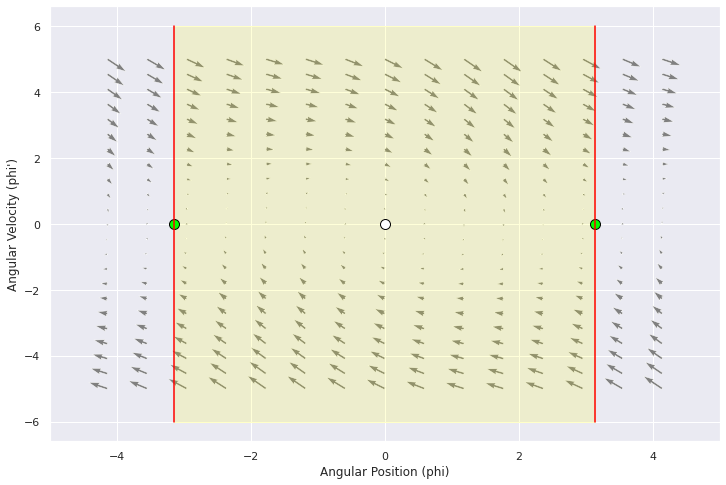

In [2]:
def create_strip(ymin=-4,ymax=4,figlength=12,figheight=8,numVectors=200,damping=0):
  plt.figure(figsize=(figlength,figheight))
  xmin = -np.pi; xmax = -xmin
  NUM = 100

  epsilon = 1
  ratio = (ymax - ymin)/(2*np.pi)
  x,y = np.meshgrid(np.linspace(xmin-epsilon,xmax+epsilon,int(np.sqrt(numVectors))+1),np.linspace(ymin,ymax,int(ratio*np.sqrt(numVectors))+1))
  u = y
  v = -np.sin(x) - damping*y
  plt.quiver(x,y,u,v,color="gray",linewidth=0.5,scale=180)
  plt.plot([-np.pi for i in range(NUM)],np.linspace(ymin-epsilon,ymax+epsilon,NUM),color="red")
  plt.plot([np.pi for i in range(NUM)],np.linspace(ymin-epsilon,ymax+epsilon,NUM),color="red")
  plt.fill_between(np.linspace(xmax,xmin,NUM),[ymin-epsilon for i in range(NUM)],[ymax+epsilon for i in range(NUM)],alpha=0.15,color="yellow")
  plt.xlim((-5,5))
  plt.xlabel("Angular Position (phi)")
  plt.ylabel("Angular Velocity (phi')")
  plt.scatter(x=[0],y=[0],label="Center Equilibrium Point",s=100,edgecolor="black",color="white")
  plt.scatter(x=[np.pi],y=[0],label="Saddle Equilibrium Point",s=100,edgecolor="black",color="lime")
  plt.scatter(x=[-np.pi],y=[0],s=100,edgecolor="black",color="lime")

#creates a vector field strip with velocity in [-5,5] for pendulums with 0.5 damping
create_strip(ymin=-5,ymax=5,damping=0.5,numVectors=200)
plt.show()

Next, we create a function to plot trajectories in this strip, noting that point $(-\pi,k) \cong (\pi,k)$ for any $k \in \mathbb{R}$ as they both represent the pendulum being upright physically. We hence "teleport" a trajectory that crosses $(\pi,k)$ to $(-\pi,k)$ and vice versa so that it never leaves the strip. This function uses a recursive implementation of Euler's formula in 2D.

In [3]:
def pendulum_plotter(pos=0,vel=0,points=1000,damping=0,step_size=0.005,color="green",label=None):

  buffer = [] #storing each line segment separately as a pair of (x,y) arrays within a high-dimensional buffer

  u_1 = [pos]
  u_2 = [vel] 

  #approximating points along the solution curve using 2D Euler's method
  for i in range(points):
    du = u_2[len(u_2)-1]
    dv = -np.sin(u_1[len(u_1)-1])-damping*u_2[len(u_2)-1]
    u_1.append(u_1[len(u_1)-1]+step_size*du)
    u_2.append(u_2[len(u_2)-1]+step_size*dv)

    if (u_1[len(u_1)-1] > np.pi+0.01): #create a new line segment from overflow
      buffer.append([u_1,u_2])
      u_1 = [-np.pi]
      value = u_2[len(u_2)-1]
      u_2 = [value]

    elif (u_1[len(u_1)-1] < -np.pi-0.01):  #create a new line segment from overflow
      buffer.append([u_1,u_2])
      u_1 = [np.pi]
      value = u_2[len(u_2)-1]
      u_2 = [value]
      
  buffer.append([u_1,u_2])

  #plotting each of the line segments
  for (ENUM,line) in enumerate(buffer):
    u_1 = line[0]
    u_2 = line[1]
    if ((label == None) or (ENUM >=1 )):
      plt.plot(u_1,u_2,color=color,linewidth=1)
    else:
      plt.plot(u_1,u_2,color=color,linewidth=1,label=label)

We use this function to plot trajectories starting from $(-\pi,4.11)$ and $(-\pi,5)$.

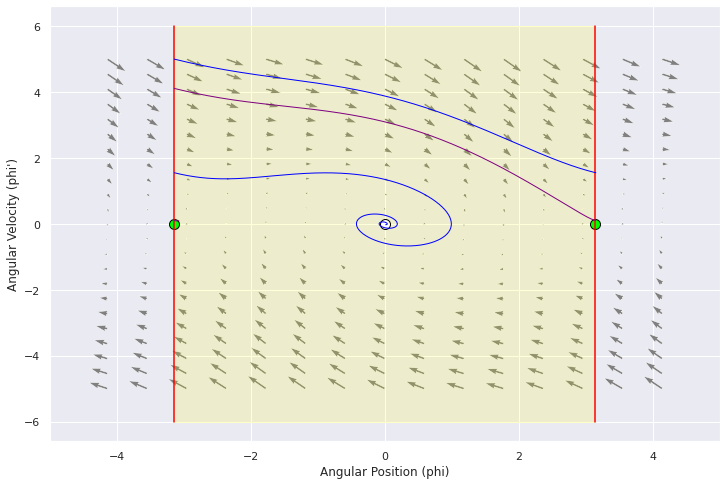

In [4]:
create_strip(ymin=-5,ymax=5,damping=0.5,numVectors=200)
pendulum_plotter(-np.pi,4.11,damping=0.5,points=1000,color="purple")
pendulum_plotter(-np.pi,5,damping=0.5,points=4000,color="blue")
plt.show()

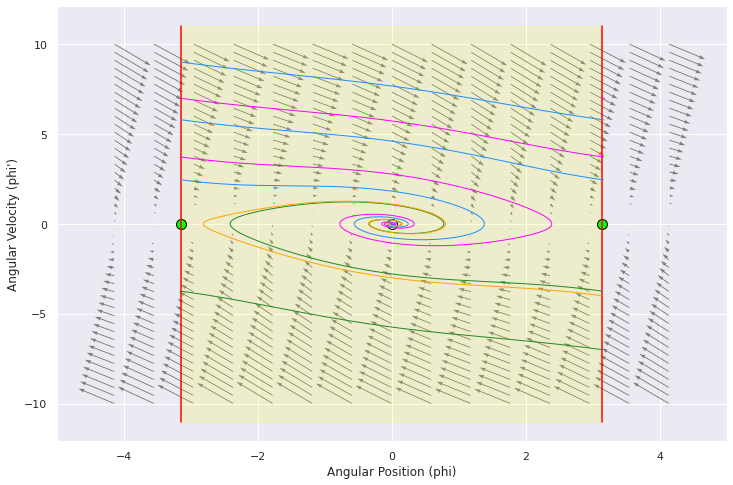

In [5]:
create_strip(ymin=-10,ymax=10,damping=0.5,numVectors=200)
pendulum_plotter(-np.pi,9,damping=0.5,points=5000,color="dodgerblue")
pendulum_plotter(np.pi,7,damping=0.5,points=4000,color="magenta")
pendulum_plotter(np.pi,-7,damping=0.5,points=4000,color="forestgreen")
pendulum_plotter(np.pi,-4,damping=0.5,points=4000,color="orange")
plt.show()

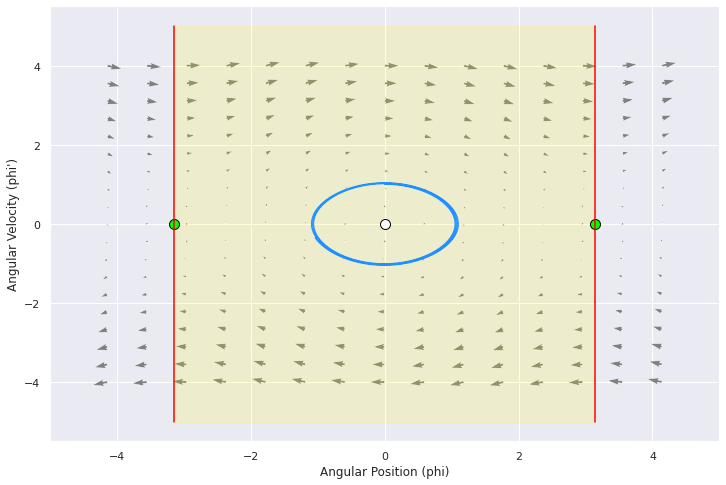

In [6]:
create_strip(ymin=-4,ymax=4,damping=0,numVectors=200)
pendulum_plotter(0,1,damping=0,points=5000,color="dodgerblue")
plt.show()

#Creating a Motion GIF Simulator of a Damped Pendulum

We first write a function that will simulate the trajectory of the pendulum and return a time-series array of the angular positions $\phi(t)$.

In [7]:
def pendulum_simulator(pos=0,vel=0,points=1000,damping=0,step_size=0.005):

  buffer = [] #storing each line segment separately as a pair of (x,y) arrays within a high-dimensional buffer

  u_1 = [pos]
  u_2 = [vel] 

  #approximating points along the solution curve using 2D Euler's method
  for i in range(points):
    du = u_2[len(u_2)-1]
    dv = -np.sin(u_1[len(u_1)-1])-damping*u_2[len(u_2)-1]
    u_1.append(u_1[len(u_1)-1]+step_size*du)
    u_2.append(u_2[len(u_2)-1]+step_size*dv)
    if (u_1[len(u_1)-1] > np.pi+0.01): #create a new line segment from overflow
      buffer.append([u_1,u_2])
      u_1 = [-np.pi]
      value = u_2[len(u_2)-1]
      u_2 = [value]
    elif (u_1[len(u_1)-1] < -np.pi-0.01):  #create a new line segment from overflow
      buffer.append([u_1,u_2])
      u_1 = [np.pi]
      value = u_2[len(u_2)-1]
      u_2 = [value]
  buffer.append([u_1,u_2])

  #aggregatting the buffer position data
  agg_position = []
  for (ENUM,line) in enumerate(buffer):
    u_1 = line[0]
    agg_position.extend(u_1)
  return(agg_position)

In [8]:
buffer = pendulum_simulator(-np.pi,4.11,damping=0.5,points=1000)
print(buffer[:10])

[-3.141592653589793, -3.121042653589793, -3.100544028589793, -3.080096136438452, -3.0596983380900333, -3.039349997793411, -3.019050483277371, -2.9987991659322315, -2.978595420987795, -2.9584386276876513]


As the buffer provides data as angular coordinates, we will convert them into $x$ and $y$ coordinates to draw the pendulum, centered at $(0,0)$ with radius $1$, in space.

In [9]:
def convert_to_2D(theta):
  if (np.abs(theta-0) <= 0.001):
    return([0,-1])
  elif ((np.abs(theta-np.pi) <= 0.001) or (np.abs(theta) >= np.pi)):
    return([0,1])
  else:
    return([np.cos(theta-np.pi/2),np.sin(theta-np.pi/2)])

convert_to_2D(np.pi/2)

[1.0, 0.0]

We create a set of utility functions to draw each individual frame of the moving pendulum by selecting a sequence of the simulated coordinates. The drawn frames will be stored in a folder called movieclip.

In [10]:
#run only when the movieclip folder does not already exist
!mkdir movieclip

mkdir: cannot create directory ‘movieclip’: File exists


In [11]:
#draws each frame of the pendulum given the angular position
def create_frame(epsilon = 0.5,theta=0,identifier=0,dirname="movieclip"):
  plt.figure(figsize=(2.5,2.5))
  plt.xlim((-1-epsilon,1+epsilon))
  plt.ylim((-1-epsilon,1+epsilon))
  coords = convert_to_2D(theta)
  #converts angular position into (x,y) coordinate
  plt.scatter(x=[coords[0]],y=[coords[1]],color="dodgerblue",s=100)
  #draws the line to represent the pendulum string
  plt.plot(np.linspace(coords[0],0,100),np.linspace(coords[1],0,100),color="dodgerblue")
  plt.axis('off')
  plt.title("Frame {}".format(identifier))
  plt.savefig("./{}/{:03d}".format(dirname,identifier))
  plt.close()

#clears the folder of frame images to eliminate remnant files from previous simulations
def clear_directory(dirname):
  files = glob.glob('./{}/*.png'.format(dirname))
  for f in files:
    os.remove(f)

#creates a sequence of pendulum motion frames that will be used for the gif
def create_animation_frames(pos=0,vel=0,points=1000,damping=0,points_per_frame=4,dirname="movieclip"):
  clear_directory(dirname)
  buffer = pendulum_simulator(pos,vel,points,damping)
  frames = int(points/points_per_frame)
  for i in range(frames):
    create_frame(epsilon=0.5,theta=buffer[points_per_frame*i],identifier=i)

#building the gif from the image frames inside the folder
def animation_studio(dirname="movieclip"):
  anim_file = 'pendulum.gif'

  with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./{}/*.png'.format(dirname))
    filenames = sorted(filenames)
    for filename in filenames:
      image = imageio.imread(filename)
      writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


Finally, we write a harness to put everything together and actually show the pendulum motion. 


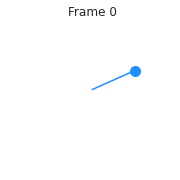

In [12]:
def animator_harness(pos=0,vel=0,points=1000,damping=0,points_per_frame=4,dirname="movieclip"):
  create_animation_frames(pos,vel,points,damping,points_per_frame,dirname)
  animation_studio(dirname)

#this might take around 5-20 seconds depending on number of frames 
animator_harness(pos=2,vel=2,damping=0.5,points=1500,points_per_frame=30)
embed.embed_file("pendulum.gif") #visualizes the pendulum

Note that increasing the number of points will show the pendulum motion for a longer duration of time from $t = 0$ and decreasing the number of points per frame (must be an integer $>=1$) will increase the frame rate and resolution of the simulation.


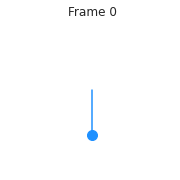

In [13]:
#undamped pendulum with high energy
animator_harness(pos=0,vel=3,damping=0,points=4000,points_per_frame=50)
embed.embed_file("pendulum.gif")


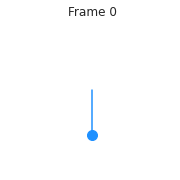

In [14]:
#more traditional oscillatory and undamped pendulum
animator_harness(pos=0,vel=1,damping=0,points=4000,points_per_frame=50)
embed.embed_file("pendulum.gif")


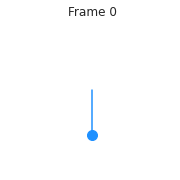

In [15]:
#dampening factor 1 (reaches equilibrium at angular position 0)
animator_harness(pos=0,vel=2,damping=1,points=3000,points_per_frame=50)
embed.embed_file("pendulum.gif")